**Retrieve Data**

In [65]:
import pandas as pd
data = pd.read_csv('SMSSpamCollection.csv', encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Data Pre-Processing**

In [66]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data.columns = ["label", "text"]
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [67]:
data['length'] = data['text'].apply(len)
data

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002630923E190>,
      dtype=object)

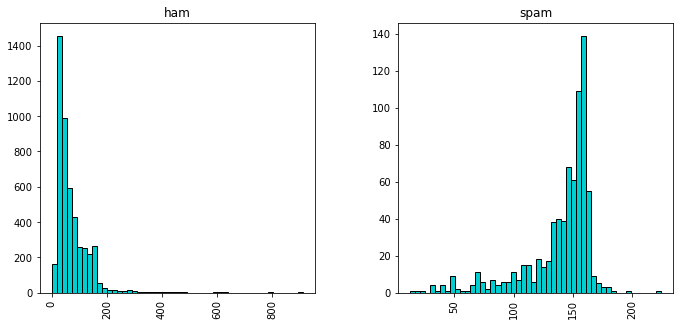

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
data.hist(column='length', by='label', bins=50,figsize=(11,5), color = "darkturquoise")

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, 
                          max_font_size=100, relative_scaling=0.5, 
                          colormap='RdBu').generate(all_words)

    plt.figure(figsize=(6, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

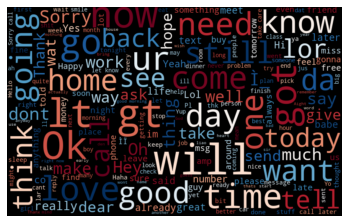

In [70]:
ham = ' '.join([text for text in data['text'][data.label == "ham"]])
generate_wordcloud(ham)

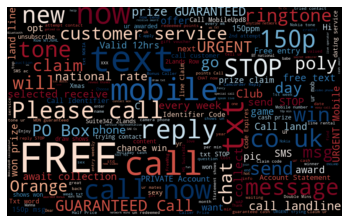

In [53]:
spam = ' '.join([text for text in data['text'][data.label == "spam"]])
generate_wordcloud(spam)

In [71]:
from nltk.stem import SnowballStemmer
def pre_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() 
            if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words


In [72]:
import nltk
import string
#nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

textFeatures = data['text'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

C:\Users\Tania Ciu\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


**Data Splitting**

In [73]:
# Map dataframe to encode values and put values into a numpy array
encoded_labels = data['label'].map(lambda x: 1 if x == 'spam' else 0).values # ham will be 0 and spam will be 1

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, 
                                                    test_size=0.3, random_state=272)

**Data Modeling and Data Validation**

In [75]:
import numpy as np 

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

# Calculate accuracy by using confusion matrix
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.GnBu)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

*Support Vector Machine Algorithm*

Accuracy Score = 0.9706937799043063


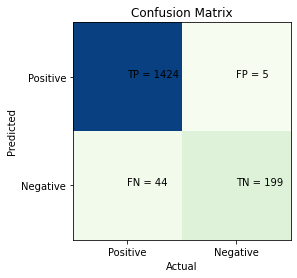

In [76]:
from sklearn import svm

svm_clf = svm.SVC(kernel='sigmoid', gamma=1.0,probability=True)
svm_clf.fit(X_train,y_train)
pred_svm = svm_clf.predict(X_test.toarray())
accuracy_svm = accuracy_score(y_test, pred_svm)
print(f'Accuracy Score = {accuracy_svm}')
conf_matrix_svm = confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(conf_matrix_svm)

*Naive Bayes Algorithm*

Accuracy Score = 0.8738038277511961


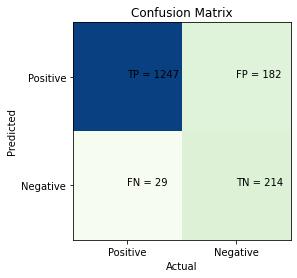

In [77]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train.toarray(), y_train)
pred_nb = nb_clf.predict(X_test.toarray())
accuracy_nb = accuracy_score(y_test, pred_nb)
print(f'Accuracy Score = {accuracy_nb}')
conf_matrix_nb = confusion_matrix(y_test, pred_nb)
plot_confusion_matrix(conf_matrix_nb)

***Support Vector Machine and Naive Bayes Algorithm***

In [80]:
def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [85]:
classifiers=[]
classifiers.append(('SVM',svm_clf))
classifiers.append(('NB',nb_clf))

result=[]
cnf_matric_parameter=[]
for i,v in classifiers:
    pred=v.predict(X_test.todense())
    acc=accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    #print(precision)
    f_measure=f1_score(y_test,pred)
    result.append((i,acc,precision,recall,f_measure))
    
    TP,FP,TN,FN=perf_measure(y_test,pred)
    cnf_matric_parameter.append((i,TP,FP,TN,FN))

In [86]:
column_names=['Algorithm','Accuracy','Precision','Recall','F-measure']
df1=pd.DataFrame(result,columns=column_names)
print(df1)

  Algorithm  Accuracy  Precision    Recall  F-measure
0       SVM  0.970694   0.975490  0.818930   0.890380
1        NB  0.873804   0.540404  0.880658   0.669797


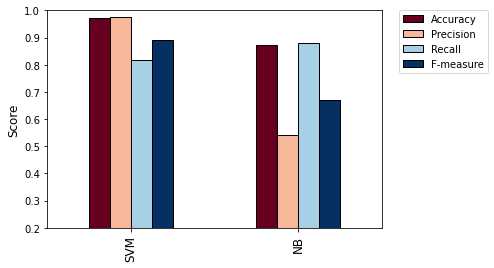

In [87]:
df1.plot(kind='bar', ylim=(0.2,1.0), align='center', colormap="RdBu")
plt.xticks(np.arange(2), df1['Algorithm'],fontsize=12)
plt.ylabel('Score',fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)